In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ogb.linkproppred import LinkPropPredDataset
import pandas as pd
import numpy as np

In [3]:
dataset = LinkPropPredDataset(name = 'ogbl-ppa')

split_edge = dataset.get_edge_split()
train_edge, valid_edge, test_edge = split_edge["train"], split_edge["valid"], split_edge["test"]
graph = dataset[0] # graph: library-agnostic graph object

In [6]:
graph

{'edge_index': array([[191305, 261775, 165310, ..., 116925, 207396,  15651],
        [261775, 191305, 359025, ..., 301988,  15651, 207396]]),
 'edge_feat': None,
 'node_feat': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'num_nodes': 576289}

# NetworkX

In [4]:
G = nx.Graph()

for i in range(graph['num_nodes']):
    source = graph['edge_index'][0][i]
    target = graph['edge_index'][1][i]
    G.add_edge(source, target)

In [10]:
G.number_of_edges()

288145

In [11]:
G.number_of_nodes()

273721

In [ ]:
results = nx.average_clustering(G)

# Save the results
with open('average_clustering.txt', 'w') as f:
    f.write(str(results))

0.0015220416414081937

# Average Degree connectivity

In [12]:
# it gives the average of the average_neighbor_degree 
# of all nodes with the same degree. 
# It is a measure of how connected nodes with certain degrees are
results_dict = nx.average_degree_connectivity(G)

# Save results in pd.DataFrame
results_df = pd.DataFrame(results_dict.items(), columns=['Degree', 'Average Connectivity'])

# Save results in csv
results_df.to_csv('average_degree_connectivity.csv', index=False)


# Average neighbor_degree

In [11]:
results_dict = nx.average_neighbor_degree(G)

# Save results in pd.DataFrame
results_df = pd.DataFrame(results_dict.items(), columns=['Node', 'Average Neighbor Degree'])

# Save results in csv
results_df.to_csv('average_neighbor_degree.csv', index=False)

In [ ]:
# results_dict = nx.average_node_connectivity(G)

# # Save results in pd.DataFrame
# results_df = pd.DataFrame(results_dict.items(), columns=['Node', 'Average Node Connectivity'])

# # Save results in csv
# results_df.to_csv('average_node_connectivity.csv', index=False)

# Triangles in the Graph

In [10]:
# Find the Big Clusters
results = nx.cluster.triangles(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Triangles'])

# Save in csv
results_df.to_csv('triangles.csv', index=False)

# Degree Distribution

## Whole Graph

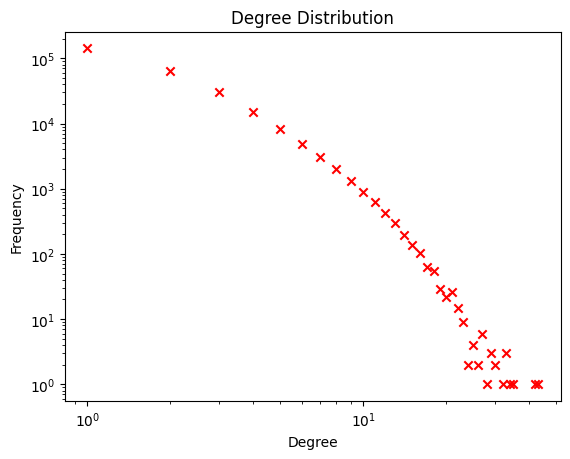

In [47]:
# make the degree distribution in pandas
results = nx.degree_histogram(G)

# plot the degree distribution as scatter
plt.scatter(range(len(results)), results, c='r', marker='x')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')

## Giant Component

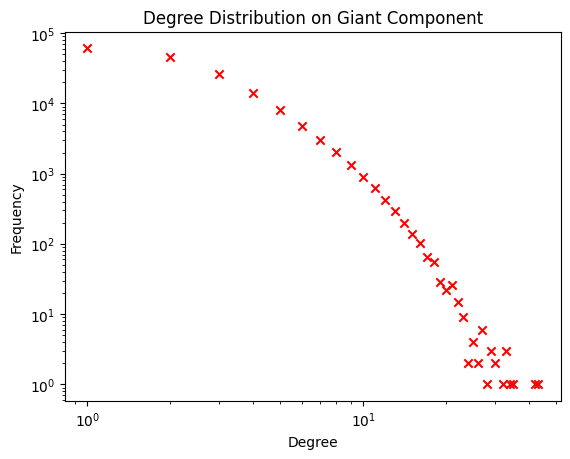

In [50]:
# Find the giant component
results = nx.connected_components(G)
results = list(results)
G_giant = G.subgraph(sorted(results[0]))

# make the degree distribution in pandas
results = nx.degree_histogram(G_giant)

# plot the degree distribution as scatter
plt.scatter(range(len(results)), results, c='r', marker='x')
plt.title('Degree Distribution on Giant Component')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')

# Degree Centrality

## Whole Graph

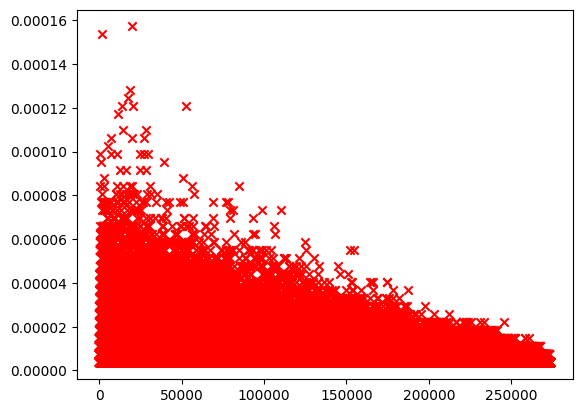

In [57]:
# Calculate degree centrality
results = nx.degree_centrality(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Degree Centrality'])

# plot the degree centrality as scatter
plt.scatter(range(len(results)), results.values(), c='r', marker='x')

## Giant Component

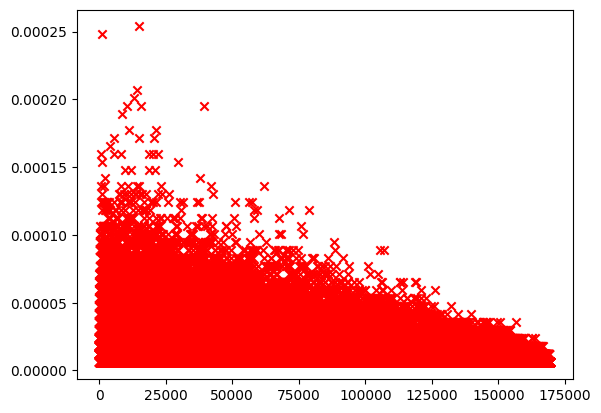

In [59]:
# Find the giant component
results = nx.connected_components(G)
results = list(results)
G_giant = G.subgraph(sorted(results[0]))

# Calculate degree centrality
results = nx.degree_centrality(G_giant)

results_df = pd.DataFrame(results.items(), columns=['Node', 'Degree Centrality'])

# plot the degree centrality as scatter
plt.scatter(range(len(results)), results.values(), c='r', marker='x')

# Clustering Coefficient

Text(0, 0.5, 'Clustering Coefficient')

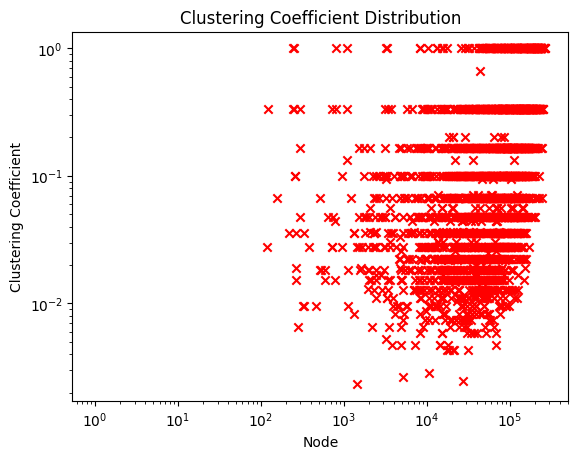

In [52]:
# Clustering Coefficient distribution
results = nx.clustering(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Clustering Coefficient'])

# plot the degree distribution as scatter
plt.scatter(range(len(results_df)), results_df['Clustering Coefficient'], c='r', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Node')
plt.ylabel('Clustering Coefficient')

In [15]:
# Find the giant component
results = nx.connected_components(G)
results = list(results)

In [ ]:
G_giant = G.subgraph(sorted(results[0]))
print(f"Number of nodes in the giant component: {G_giant.number_of_nodes()}")
print(f"Number of edges in the giant component: {G_giant.number_of_edges()}")

(288145, 221393)

In [37]:
print(f'Percent of total edges in giant component: {G_giant.number_of_edges() / G.number_of_edges()}')
print(f'Percent of total nodes in giant component: {G_giant.number_of_nodes() / G.number_of_nodes()}')

Percent of total edges in giant component: 0.7683388571726041
Percent of total nodes in giant component: 0.6191888821098857


In [40]:
# Save the giant component
nx.write_graphml(G_giant, 'giant_component.graphml')

In [21]:
for i, conected_component in enumerate(results):
    component = pd.DataFrame(conected_component, columns=['Node'])
    component.to_csv(f'./connected_components/connected_component_{i}.csv', index=False)

# Betweenness

In [ ]:
# calculate betweenness centrality
results = nx.betweenness_centrality(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Betweenness Centrality'])

# save it in csv
results_df.to_csv('betweenness_centrality.csv', index=False)

# Closeness

In [9]:
# # calculate closeness
results = nx.closeness_centrality(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Closeness Centrality'])

# Save results in csv
results_df.to_csv('closeness_centrality.csv', index=False)

KeyboardInterrupt: 

# Harmonic Centrality
This is used to compute closeness even for not connected components (between those)

In [5]:
# calculate harmonic centrality
results = nx.harmonic_centrality(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Harmonic Centrality'])

# Save results in csv
results_df.to_csv('harmonic_centrality.csv', index=False)

KeyboardInterrupt: 

# Eigencentrality

How central you are, depends on how central your neighbors are

In [6]:
# calculate eigencentrality
results = nx.eigenvector_centrality(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Eigenvector Centrality'])

# Save results in csv
results_df.to_csv('eigenvector_centrality.csv', index=False)

# Katz centrality

Katz centrality[30] is a generalization of degree centrality. Degree centrality measures the number of direct neighbors, and Katz centrality measures the number of all nodes that can be connected through a path, while the contributions of distant nodes are penalized

[wikipedia](https://en.wikipedia.org/wiki/Centrality)

In [7]:
# calculate katz centrality
results = nx.katz_centrality(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'Katz Centrality'])

# Save results in csv
results_df.to_csv('katz_centrality.csv', index=False)

# PageRank

In [8]:
# calculate pagerank
results = nx.pagerank(G)

# Save in pd.DataFrame
results_df = pd.DataFrame(results.items(), columns=['Node', 'PageRank'])

# Save results in csv
results_df.to_csv('pagerank.csv', index=False)